# TMDB Movie Data Analysis Pipeline.

## Project objectives:
1. API Data extraction
2. Data cleaning and Transformation
3. Exploratory Data Analysis
4. Advance filtering and Ranking
5. Franchise and Director analysis



#Importing Project Dependencies and Libraries

In [80]:
import os
import ast
import json
import requests
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from dotenv import load_dotenv

# Setting up Environment variables

# Extracting the TMDB movies data from and API endpoint

In [81]:
import requests
import os
load_dotenv()

def extract_tmdb_data(api_key, movie_ids):

    base_url = 'https://api.themoviedb.org/3/movie/'
    movies_data = []

    for movie_id in movie_ids:
        # Construct the URL correctly for the specific movie_id
        url = f"{base_url}{movie_id}?api_key={api_key}&language=en-US&append_to_response=credits"

        try:
            response = requests.get(url)

            # Check for a successful status code
            if response.status_code == 200:
                movie_data = response.json()
                movies_data.append(movie_data)
            else:
                # Print specific error details for IDs
                print(f"Failed to fetch movie with ID {movie_id}. Status Code: {response.status_code}")

        except requests.exceptions.RequestException as e:
            # Handle network-related errors
            print(f"An error occurred while fetching ID {movie_id}: {e}")

    return movies_data



# Ensure you have set the environment variable 'TMDB_API_KEY'
api_key = "2410bb474c8a6e174702a927311e406c"

if not api_key:
    print("Error: TMDB_API_KEY environment variable not found. Please set it.")
else:
    movie_ids = [0, 299534, 19995, 140607, 299536, 597,
                 135397, 420818, 24428, 168259, 99861, 284054,
                 12445, 181808, 330457, 351286, 109445, 321612,
                 260513]

    movies = extract_tmdb_data(api_key, movie_ids)

    # Check the result
    print(f"\nSuccessfully extracted data for {len(movies)} movies.")






Failed to fetch movie with ID 0. Status Code: 404

Successfully extracted data for 18 movies.


In [82]:
full_movies_df = pd.DataFrame(movies)
movies_df= full_movies_df.copy()
movies_df.columns

Index(['adult', 'backdrop_path', 'belongs_to_collection', 'budget', 'genres',
       'homepage', 'id', 'imdb_id', 'origin_country', 'original_language',
       'original_title', 'overview', 'popularity', 'poster_path',
       'production_companies', 'production_countries', 'release_date',
       'revenue', 'runtime', 'spoken_languages', 'status', 'tagline', 'title',
       'video', 'vote_average', 'vote_count', 'credits'],
      dtype='object')

#Data cleaning and Preprocessing

In [83]:
# Droping irrelevant columns
columns_to_drop = ['adult', 'imdb_id', 'original_title', 'video', 'homepage']

# Drop only existing columns
existing_columns_to_drop = [col for col in columns_to_drop if col in movies_df.columns]
movies_df.drop(columns=existing_columns_to_drop, inplace=True)


In [84]:
movies_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18 entries, 0 to 17
Data columns (total 22 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   backdrop_path          18 non-null     object 
 1   belongs_to_collection  16 non-null     object 
 2   budget                 18 non-null     int64  
 3   genres                 18 non-null     object 
 4   id                     18 non-null     int64  
 5   origin_country         18 non-null     object 
 6   original_language      18 non-null     object 
 7   overview               18 non-null     object 
 8   popularity             18 non-null     float64
 9   poster_path            18 non-null     object 
 10  production_companies   18 non-null     object 
 11  production_countries   18 non-null     object 
 12  release_date           18 non-null     object 
 13  revenue                18 non-null     int64  
 14  runtime                18 non-null     int64  
 15  spoken_l

In [85]:
movies_df.describe()

,budget,id,popularity,revenue,runtime,vote_average,vote_count
count,1.800000e+01,18.000000,18.000000,1.800000e+01,18.000000,18.000000,18.000000
mean,2.137778e+08,192258.444444,15.182833,1.691832e+09,138.055556,7.396444,20437.333333
std,6.195972e+07,132476.949284,10.122407,5.210623e+08,23.848720,0.506292,7755.909368
min,1.250000e+08,597.000000,6.581100,1.243226e+09,102.000000,6.537000,10078.000000
25%,1.625000e+08,102257.000000,8.627200,1.334902e+09,125.250000,7.132250,13988.250000
50%,2.000000e+08,175033.500000,10.463850,1.484542e+09,135.500000,7.285500,20615.500000
75%,2.430000e+08,299535.500000,18.038275,1.957196e+09,147.500000,7.801000,25859.750000
max,3.560000e+08,420818.000000,40.302100,2.923706e+09,194.000000,8.237000,34329.000000


from matplotlib import pyplot as plt
_df_0['budget'].plot(kind='hist', bins=20, title='budget')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['id'].plot(kind='hist', bins=20, title='id')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['popularity'].plot(kind='hist', bins=20, title='popularity')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3['revenue'].plot(kind='hist', bins=20, title='revenue')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_4.plot(kind='scatter', x='budget', y='id', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_5.plot(kind='scatter', x='id', y='popularity', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_6.plot(kind='scatter', x='popularity', y='revenue', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_7.plot(kind='scatter', x='revenue', y='runtime', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['runtime']
  ys = series['budget']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_8.sort_values('runtime', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('runtime')
_ = plt.ylabel('budget')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['runtime']
  ys = series['id']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_9.sort_values('runtime', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('runtime')
_ = plt.ylabel('id')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['runtime']
  ys = series['popularity']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_10.sort_values('runtime', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('runtime')
_ = plt.ylabel('popularity')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['runtime']
  ys = series['revenue']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_11.sort_values('runtime', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('runtime')
_ = plt.ylabel('revenue')

from matplotlib import pyplot as plt
_df_12['budget'].plot(kind='line', figsize=(8, 4), title='budget')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_13['id'].plot(kind='line', figsize=(8, 4), title='id')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_14['popularity'].plot(kind='line', figsize=(8, 4), title='popularity')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_15['revenue'].plot(kind='line', figsize=(8, 4), title='revenue')
plt.gca().spines[['top', 'right']].set_visible(False)

In [86]:
movies_df

,backdrop_path,belongs_to_collection,budget,genres,id,origin_country,original_language,overview,popularity,poster_path,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,credits
0,/9wXPKruA6bWYk2co5ix6fH59Qr8.jpg,"{'id': 86311, 'name': 'The Avengers Collection...",356000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 878, ...",299534,[US],en,After the devastating events of Avengers: Infi...,12.0878,/bR8ISy1O9XQxqiy0fQFw2BX72RQ.jpg,...,2019-04-24,2799439100,181,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Avenge the fallen.,Avengers: Endgame,8.237,26978,"{'cast': [{'adult': False, 'gender': 2, 'id': ..."
1,/7JNzw1tSZZEgsBw6lu0VfO2X2Ef.jpg,"{'id': 87096, 'name': 'Avatar Collection', 'po...",237000000,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",19995,[US],en,"In the 22nd century, a paraplegic Marine is di...",38.2316,/gKY6q7SjCkAU6FqvqWybDYgUKIF.jpg,...,2009-12-15,2923706026,162,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Enter the world of Pandora.,Avatar,7.594,32883,"{'cast': [{'adult': False, 'gender': 2, 'id': ..."
2,/8BTsTfln4jlQrLXUBquXJ0ASQy9.jpg,"{'id': 10, 'name': 'Star Wars Collection', 'po...",245000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 28, '...",140607,[US],en,Thirty years after defeating the Galactic Empi...,7.5842,/wqnLdwVXoBjKibFRR5U3y0aDUhs.jpg,...,2015-12-15,2068223624,136,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Every generation has a story.,Star Wars: The Force Awakens,7.300,20104,"{'cast': [{'adult': False, 'gender': 2, 'id': ..."
3,/mDfJG3LC3Dqb67AZ52x3Z0jU0uB.jpg,"{'id': 86311, 'name': 'The Avengers Collection...",300000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 28, '...",299536,[US],en,As the Avengers and their allies have continue...,20.7267,/7WsyChQLEftFiDOVTGkv3hFpyyt.jpg,...,2018-04-25,2052415039,149,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Destiny arrives all the same.,Avengers: Infinity War,8.235,31188,"{'cast': [{'adult': False, 'gender': 2, 'id': ..."
4,/xnHVX37XZEp33hhCbYlQFq7ux1J.jpg,None,200000000,"[{'id': 18, 'name': 'Drama'}, {'id': 10749, 'n...",597,[US],en,101-year-old Rose DeWitt Bukater tells the sto...,23.4289,/9xjZS2rlVxm8SFx8kPC3aIGCOYQ.jpg,...,1997-11-18,2264162353,194,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Nothing on earth could come between them.,Titanic,7.903,26519,"{'cast': [{'adult': False, 'gender': 2, 'id': ..."
5,/dF6FjTZzRTENfB4R17HDN20jLT2.jpg,"{'id': 328, 'name': 'Jurassic Park Collection'...",150000000,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",135397,[US],en,Twenty-two years after the events of Jurassic ...,9.3758,/rhr4y79GpxQF9IsfJItRXVaoGs4.jpg,...,2015-06-06,1671537444,124,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,The park is open.,Jurassic World,6.699,21127,"{'cast': [{'adult': False, 'gender': 2, 'id': ..."
6,/1TUg5pO1VZ4B0Q1amk3OlXvlpXV.jpg,"{'id': 762512, 'name': 'The Lion King (Reboot)...",260000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 18, '...",420818,[US],en,"Simba idolizes his father, King Mufasa, and ta...",8.5563,/dzBtMocZuJbjLOXvrl4zGYigDzh.jpg,...,2019-07-12,1662020819,118,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,The king has returned.,The Lion King,7.102,10571,"{'cast': [{'adult': False, 'gender': 2, 'id': ..."
7,/9BBTo63ANSmhC4e6r62OJFuK2GL.jpg,"{'id': 86311, 'name': 'The Avengers Collection...",220000000,"[{'id': 878, 'name': 'Science Fiction'}, {'id'...",24428,[US],en,When an unexpected enemy emerges and threatens...,40.3021,/RYMX2wcKCBAr24UyPD7xwmjaTn.jpg,...,2012-04-25,1518815515,143,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Some assembly required.,The Avengers,7.870,34329,"{'cast': [{'adult': False, 'gender': 2, 'id': ..."
8,/ehzI1mVcnHqB58NqPyQwpMqcVoz.jpg,"{'id': 9485, 'name': 'The Fast and the Furious...",190000000,"[{'id': 28, 'name': 'Action'}, {'id': 80, 'nam...",168259,[US],en,Deckard Shaw seeks revenge against Dominic To

In [87]:
movies_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18 entries, 0 to 17
Data columns (total 22 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   backdrop_path          18 non-null     object 
 1   belongs_to_collection  16 non-null     object 
 2   budget                 18 non-null     int64  
 3   genres                 18 non-null     object 
 4   id                     18 non-null     int64  
 5   origin_country         18 non-null     object 
 6   original_language      18 non-null     object 
 7   overview               18 non-null     object 
 8   popularity             18 non-null     float64
 9   poster_path            18 non-null     object 
 10  production_companies   18 non-null     object 
 11  production_countries   18 non-null     object 
 12  release_date           18 non-null     object 
 13  revenue                18 non-null     int64  
 14  runtime                18 non-null     int64  
 15  spoken_l

# Handling json like colums

In [88]:
def extract_name_from_json(json_obj):
    """
    Safely extracts names from dictionary or list-of-dictionary structures.

    Args:
        json_obj: A JSON object (dictionary, list of dictionaries, or string representation)
                  or None.

    Returns:
        A string of names separated by '|' if multiple, a single name, or np.nan if not found or invalid.
    """
    if json_obj is None:
        return np.nan

    try:
        # Attempt to convert string representation of JSON to a Python object
        if isinstance(json_obj, str):
            parsed_obj = ast.literal_eval(json_obj)
        else:
            parsed_obj = json_obj

        if isinstance(parsed_obj, dict):
            # If it's a dictionary, extract the 'name' key
            return parsed_obj.get('name', np.nan)
        elif isinstance(parsed_obj, list):
            # If it's a list, iterate and extract 'name' from each dictionary
            names = []
            for item in parsed_obj:
                if isinstance(item, dict) and 'name' in item:
                    names.append(item['name'])
            return '|'.join(names) if names else np.nan
        else:
            return np.nan

    except (ValueError, SyntaxError, TypeError):
        # Handle errors during ast.literal_eval or if the structure is unexpected
        return np.nan

print("Finish extracting name from json columns.")

Finish extracting name from json columns.


In [89]:
columns_to_process = ['genres', 'spoken_languages', 'production_companies', 'production_countries', 'belongs_to_collection']

for col in columns_to_process:
    if col in movies_df.columns: # Check if column exists before processing
        movies_df[col] = movies_df[col].apply(extract_name_from_json)
        print(f"JSON column '{col}' processed in-place.")
    else:
        print(f"Warning: Column '{col}' not found in DataFrame. Skipping processing.")

print("JSON columns processing complete.")
movies_df.head()
movies_df.info()

JSON column 'genres' processed in-place.
JSON column 'spoken_languages' processed in-place.
JSON column 'production_companies' processed in-place.
JSON column 'production_countries' processed in-place.
JSON column 'belongs_to_collection' processed in-place.
JSON columns processing complete.
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18 entries, 0 to 17
Data columns (total 22 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   backdrop_path          18 non-null     object 
 1   belongs_to_collection  16 non-null     object 
 2   budget                 18 non-null     int64  
 3   genres                 18 non-null     object 
 4   id                     18 non-null     int64  
 5   origin_country         18 non-null     object 
 6   original_language      18 non-null     object 
 7   overview               18 non-null     object 
 8   popularity             18 non-null     float64
 9   poster_path            18 no

In [90]:
movies_df

,backdrop_path,belongs_to_collection,budget,genres,id,origin_country,original_language,overview,popularity,poster_path,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,credits
0,/9wXPKruA6bWYk2co5ix6fH59Qr8.jpg,The Avengers Collection,356000000,Adventure|Science Fiction|Action,299534,[US],en,After the devastating events of Avengers: Infi...,12.0878,/bR8ISy1O9XQxqiy0fQFw2BX72RQ.jpg,...,2019-04-24,2799439100,181,English|日本語|,Released,Avenge the fallen.,Avengers: Endgame,8.237,26978,"{'cast': [{'adult': False, 'gender': 2, 'id': ..."
1,/7JNzw1tSZZEgsBw6lu0VfO2X2Ef.jpg,Avatar Collection,237000000,Action|Adventure|Fantasy|Science Fiction,19995,[US],en,"In the 22nd century, a paraplegic Marine is di...",38.2316,/gKY6q7SjCkAU6FqvqWybDYgUKIF.jpg,...,2009-12-15,2923706026,162,English|Español,Released,Enter the world of Pandora.,Avatar,7.594,32883,"{'cast': [{'adult': False, 'gender': 2, 'id': ..."
2,/8BTsTfln4jlQrLXUBquXJ0ASQy9.jpg,Star Wars Collection,245000000,Adventure|Action|Science Fiction,140607,[US],en,Thirty years after defeating the Galactic Empi...,7.5842,/wqnLdwVXoBjKibFRR5U3y0aDUhs.jpg,...,2015-12-15,2068223624,136,English,Released,Every generation has a story.,Star Wars: The Force Awakens,7.300,20104,"{'cast': [{'adult': False, 'gender': 2, 'id': ..."
3,/mDfJG3LC3Dqb67AZ52x3Z0jU0uB.jpg,The Avengers Collection,300000000,Adventure|Action|Science Fiction,299536,[US],en,As the Avengers and their allies have continue...,20.7267,/7WsyChQLEftFiDOVTGkv3hFpyyt.jpg,...,2018-04-25,2052415039,149,English|,Released,Destiny arrives all the same.,Avengers: Infinity War,8.235,31188,"{'cast': [{'adult': False, 'gender': 2, 'id': ..."
4,/xnHVX37XZEp33hhCbYlQFq7ux1J.jpg,NaN,200000000,Drama|Romance,597,[US],en,101-year-old Rose DeWitt Bukater tells the sto...,23.4289,/9xjZS2rlVxm8SFx8kPC3aIGCOYQ.jpg,...,1997-11-18,2264162353,194,English|Français|Deutsch|svenska|Italiano|Pусский,Released,Nothing on earth could come between them.,Titanic,7.903,26519,"{'cast': [{'adult': False, 'gender': 2, 'id': ..."
5,/dF6FjTZzRTENfB4R17HDN20jLT2.jpg,Jurassic Park Collection,150000000,Action|Adventure|Science Fiction|Thriller,135397,[US],en,Twenty-two years after the events of Jurassic ...,9.3758,/rhr4y79GpxQF9IsfJItRXVaoGs4.jpg,...,2015-06-06,1671537444,124,English,Released,The park is open.,Jurassic World,6.699,21127,"{'cast': [{'adult': False, 'gender': 2, 'id': ..."
6,/1TUg5pO1VZ4B0Q1amk3OlXvlpXV.jpg,The Lion King (Reboot) Collection,260000000,Adventure|Drama|Family|Animation,420818,[US],en,"Simba idolizes his father, King Mufasa, and ta...",8.5563,/dzBtMocZuJbjLOXvrl4zGYigDzh.jpg,...,2019-07-12,1662020819,118,English,Released,The king has returned.,The Lion King,7.102,10571,"{'cast': [{'adult': False, 'gender': 2, 'id': ..."
7,/9BBTo63ANSmhC4e6r62OJFuK2GL.jpg,The Avengers Collection,220000000,Science Fiction|Action|Adventure,24428,[US],en,When an unexpected enemy emerges and threatens...,40.3021,/RYMX2wcKCBAr24UyPD7xwmjaTn.jpg,...,2012-04-25,1518815515,143,English|हिन्दी|Pусский,Released,Some assembly required.,The Avengers,7.870,34329,"{'cast': [{'adult': False, 'gender': 2, 'id': ..."
8,/ehzI1mVcnHqB58NqPyQwpMqcVoz.jpg,The Fast and the Furious Collection,190000000,Action|Crime|Thriller,168259,[US],en,Deckard Shaw seeks revenge against Dominic Tor...,17.1859,/ktofZ9Htrjiy0P6LEowsDaxd3Ri.jpg,...,2015-04-01,1515400000,139,العربية|English|Español|ภาษาไทย,Released,Vengeance hits home.,Furious 7,7.223,11035,"{'cast': [{'adult': False, 'gender': 2, 'id': ..."
9,/kIBK5SKwgqIIuRKhhWrJn3XkbPq.jpg,The Avengers Collection,235000000,Action|Adventure|Science Fiction,99861,[US],en,When Tony Stark tries to jumpstart a dormant p...,11.1058,/4ssDuvEDkSArWEdyBl2X5EHvYKU.jpg,...,2015-04-22,1405403694,141,English,Released,A new age has come.,Avengers: Age of Ultron,7.271,23882,"{'cast': [{'adult': False, 'gender': 2, 'id': ..."


#Handling numeric columns and Date columns

In [91]:
# Convert specified columns to numeric, coercing errors to NaN
numeric_cols = ['budget', 'id', 'popularity', 'revenue', 'runtime', 'vote_average', 'vote_count']
for col in numeric_cols:
    movies_df[col] = pd.to_numeric(movies_df[col], errors='coerce')

# Convert 'release_date' to datetime
movies_df['release_date'] = pd.to_datetime(movies_df['release_date'], errors='coerce')

print("Datatype conversions applied.")

Datatype conversions applied.


In [92]:
movies_df

,backdrop_path,belongs_to_collection,budget,genres,id,origin_country,original_language,overview,popularity,poster_path,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,credits
0,/9wXPKruA6bWYk2co5ix6fH59Qr8.jpg,The Avengers Collection,356000000,Adventure|Science Fiction|Action,299534,[US],en,After the devastating events of Avengers: Infi...,12.0878,/bR8ISy1O9XQxqiy0fQFw2BX72RQ.jpg,...,2019-04-24,2799439100,181,English|日本語|,Released,Avenge the fallen.,Avengers: Endgame,8.237,26978,"{'cast': [{'adult': False, 'gender': 2, 'id': ..."
1,/7JNzw1tSZZEgsBw6lu0VfO2X2Ef.jpg,Avatar Collection,237000000,Action|Adventure|Fantasy|Science Fiction,19995,[US],en,"In the 22nd century, a paraplegic Marine is di...",38.2316,/gKY6q7SjCkAU6FqvqWybDYgUKIF.jpg,...,2009-12-15,2923706026,162,English|Español,Released,Enter the world of Pandora.,Avatar,7.594,32883,"{'cast': [{'adult': False, 'gender': 2, 'id': ..."
2,/8BTsTfln4jlQrLXUBquXJ0ASQy9.jpg,Star Wars Collection,245000000,Adventure|Action|Science Fiction,140607,[US],en,Thirty years after defeating the Galactic Empi...,7.5842,/wqnLdwVXoBjKibFRR5U3y0aDUhs.jpg,...,2015-12-15,2068223624,136,English,Released,Every generation has a story.,Star Wars: The Force Awakens,7.300,20104,"{'cast': [{'adult': False, 'gender': 2, 'id': ..."
3,/mDfJG3LC3Dqb67AZ52x3Z0jU0uB.jpg,The Avengers Collection,300000000,Adventure|Action|Science Fiction,299536,[US],en,As the Avengers and their allies have continue...,20.7267,/7WsyChQLEftFiDOVTGkv3hFpyyt.jpg,...,2018-04-25,2052415039,149,English|,Released,Destiny arrives all the same.,Avengers: Infinity War,8.235,31188,"{'cast': [{'adult': False, 'gender': 2, 'id': ..."
4,/xnHVX37XZEp33hhCbYlQFq7ux1J.jpg,NaN,200000000,Drama|Romance,597,[US],en,101-year-old Rose DeWitt Bukater tells the sto...,23.4289,/9xjZS2rlVxm8SFx8kPC3aIGCOYQ.jpg,...,1997-11-18,2264162353,194,English|Français|Deutsch|svenska|Italiano|Pусский,Released,Nothing on earth could come between them.,Titanic,7.903,26519,"{'cast': [{'adult': False, 'gender': 2, 'id': ..."
5,/dF6FjTZzRTENfB4R17HDN20jLT2.jpg,Jurassic Park Collection,150000000,Action|Adventure|Science Fiction|Thriller,135397,[US],en,Twenty-two years after the events of Jurassic ...,9.3758,/rhr4y79GpxQF9IsfJItRXVaoGs4.jpg,...,2015-06-06,1671537444,124,English,Released,The park is open.,Jurassic World,6.699,21127,"{'cast': [{'adult': False, 'gender': 2, 'id': ..."
6,/1TUg5pO1VZ4B0Q1amk3OlXvlpXV.jpg,The Lion King (Reboot) Collection,260000000,Adventure|Drama|Family|Animation,420818,[US],en,"Simba idolizes his father, King Mufasa, and ta...",8.5563,/dzBtMocZuJbjLOXvrl4zGYigDzh.jpg,...,2019-07-12,1662020819,118,English,Released,The king has returned.,The Lion King,7.102,10571,"{'cast': [{'adult': False, 'gender': 2, 'id': ..."
7,/9BBTo63ANSmhC4e6r62OJFuK2GL.jpg,The Avengers Collection,220000000,Science Fiction|Action|Adventure,24428,[US],en,When an unexpected enemy emerges and threatens...,40.3021,/RYMX2wcKCBAr24UyPD7xwmjaTn.jpg,...,2012-04-25,1518815515,143,English|हिन्दी|Pусский,Released,Some assembly required.,The Avengers,7.870,34329,"{'cast': [{'adult': False, 'gender': 2, 'id': ..."
8,/ehzI1mVcnHqB58NqPyQwpMqcVoz.jpg,The Fast and the Furious Collection,190000000,Action|Crime|Thriller,168259,[US],en,Deckard Shaw seeks revenge against Dominic Tor...,17.1859,/ktofZ9Htrjiy0P6LEowsDaxd3Ri.jpg,...,2015-04-01,1515400000,139,العربية|English|Español|ภาษาไทย,Released,Vengeance hits home.,Furious 7,7.223,11035,"{'cast': [{'adult': False, 'gender': 2, 'id': ..."
9,/kIBK5SKwgqIIuRKhhWrJn3XkbPq.jpg,The Avengers Collection,235000000,Action|Adventure|Science Fiction,99861,[US],en,When Tony Stark tries to jumpstart a dormant p...,11.1058,/4ssDuvEDkSArWEdyBl2X5EHvYKU.jpg,...,2015-04-22,1405403694,141,English,Released,A new age has come.,Avengers: Age of Ultron,7.271,23882,"{'cast': [{'adult': False, 'gender': 2, 'id': ..."


In [93]:
movies_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18 entries, 0 to 17
Data columns (total 22 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   backdrop_path          18 non-null     object        
 1   belongs_to_collection  16 non-null     object        
 2   budget                 18 non-null     int64         
 3   genres                 18 non-null     object        
 4   id                     18 non-null     int64         
 5   origin_country         18 non-null     object        
 6   original_language      18 non-null     object        
 7   overview               18 non-null     object        
 8   popularity             18 non-null     float64       
 9   poster_path            18 non-null     object        
 10  production_companies   18 non-null     object        
 11  production_countries   18 non-null     object        
 12  release_date           18 non-null     datetime64[ns]
 13  revenue

In [94]:
movies_df.isnull().sum()

,0
backdrop_path,0
belongs_to_collection,2
budget,0
genres,0
id,0
origin_country,0
original_language,0
overview,0
popularity,0
poster_path,0


In [95]:
movies_df['backdrop_path'].value_counts()

,count
backdrop_path,
/9wXPKruA6bWYk2co5ix6fH59Qr8.jpg,1
/7JNzw1tSZZEgsBw6lu0VfO2X2Ef.jpg,1
/8BTsTfln4jlQrLXUBquXJ0ASQy9.jpg,1
/mDfJG3LC3Dqb67AZ52x3Z0jU0uB.jpg,1
/xnHVX37XZEp33hhCbYlQFq7ux1J.jpg,1
/dF6FjTZzRTENfB4R17HDN20jLT2.jpg,1
/1TUg5pO1VZ4B0Q1amk3OlXvlpXV.jpg,1
/9BBTo63ANSmhC4e6r62OJFuK2GL.jpg,1
/ehzI1mVcnHqB58NqPyQwpMqcVoz.jpg,1


In [96]:
movies_df["genres"].value_counts()

,count
genres,
Adventure|Action|Science Fiction,3
Action|Adventure|Science Fiction|Thriller,2
Action|Adventure|Science Fiction,2
Action|Adventure|Fantasy|Science Fiction,1
Drama|Romance,1
Adventure|Science Fiction|Action,1
Adventure|Drama|Family|Animation,1
Science Fiction|Action|Adventure,1
Action|Crime|Thriller,1


In [97]:
movies_df["budget"]

,budget
0,356000000
1,237000000
2,245000000
3,300000000
4,200000000
5,150000000
6,260000000
7,220000000
8,190000000
9,235000000


# Data cleaning and preprocessing

In [98]:
# Replace zeros in budget, revenue, runtime with NaN
numeric_zero_cols = ["budget", "revenue", "runtime"]

for col in numeric_zero_cols:
    if col in movies_df.columns:
        movies_df[col] = movies_df[col].replace(0, np.nan)

# 2. Convert budget & revenue to millions of USD
if 'budget' in movies_df.columns:
    movies_df['budget_musd'] = movies_df['budget'] / 1_000_000
if 'revenue' in movies_df.columns:
    movies_df['revenue_musd'] = movies_df['revenue'] / 1_000_000

# dropping original budget and revenue columns
columns_to_drop_after_conversion = ['budget', 'revenue']
movies_df.drop(columns=[col for col in columns_to_drop_after_conversion if col in movies_df.columns], inplace=True)


# 3. Handle vote_count = 0
#     Rule: if vote_count = 0 → vote_average likely unreliable
#     Replace vote_average with NaN for safety

if "vote_count" in movies_df.columns and "vote_average" in movies_df.columns:
    movies_df.loc[movies_df["vote_count"] == 0, "vote_average"] = np.nan

# 4. Clean 'overview' and 'tagline'
#     Replace placeholders with NaN

text_columns = ["overview", "tagline"]
placeholders = ["No Data", "No overview available.", "None", "", "nan", "N/A"]

for col in text_columns:
    if col in movies_df.columns:
        movies_df[col] = movies_df[col].replace(placeholders, np.nan)

# Trim whitespace and convert empty strings to NaN
        movies_df[col] = movies_df[col].astype("string").str.strip()
        movies_df[col] = movies_df[col].replace("", np.nan)


In [99]:
movies_df.columns

Index(['backdrop_path', 'belongs_to_collection', 'genres', 'id',
       'origin_country', 'original_language', 'overview', 'popularity',
       'poster_path', 'production_companies', 'production_countries',
       'release_date', 'runtime', 'spoken_languages', 'status', 'tagline',
       'title', 'vote_average', 'vote_count', 'credits', 'budget_musd',
       'revenue_musd'],
      dtype='object')

In [100]:
#Removing duplicate values in Id and title
movies_df.drop_duplicates(subset=['id', 'title'], inplace=True)

In [101]:
movies_df

,backdrop_path,belongs_to_collection,genres,id,origin_country,original_language,overview,popularity,poster_path,production_companies,...,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,credits,budget_musd,revenue_musd
0,/9wXPKruA6bWYk2co5ix6fH59Qr8.jpg,The Avengers Collection,Adventure|Science Fiction|Action,299534,[US],en,After the devastating events of Avengers: Infi...,12.0878,/bR8ISy1O9XQxqiy0fQFw2BX72RQ.jpg,Marvel Studios,...,181,English|日本語|,Released,Avenge the fallen.,Avengers: Endgame,8.237,26978,"{'cast': [{'adult': False, 'gender': 2, 'id': ...",356.0,2799.439100
1,/7JNzw1tSZZEgsBw6lu0VfO2X2Ef.jpg,Avatar Collection,Action|Adventure|Fantasy|Science Fiction,19995,[US],en,"In the 22nd century, a paraplegic Marine is di...",38.2316,/gKY6q7SjCkAU6FqvqWybDYgUKIF.jpg,Dune Entertainment|Lightstorm Entertainment|20...,...,162,English|Español,Released,Enter the world of Pandora.,Avatar,7.594,32883,"{'cast': [{'adult': False, 'gender': 2, 'id': ...",237.0,2923.706026
2,/8BTsTfln4jlQrLXUBquXJ0ASQy9.jpg,Star Wars Collection,Adventure|Action|Science Fiction,140607,[US],en,Thirty years after defeating the Galactic Empi...,7.5842,/wqnLdwVXoBjKibFRR5U3y0aDUhs.jpg,Lucasfilm Ltd.|Bad Robot,...,136,English,Released,Every generation has a story.,Star Wars: The Force Awakens,7.300,20104,"{'cast': [{'adult': False, 'gender': 2, 'id': ...",245.0,2068.223624
3,/mDfJG3LC3Dqb67AZ52x3Z0jU0uB.jpg,The Avengers Collection,Adventure|Action|Science Fiction,299536,[US],en,As the Avengers and their allies have continue...,20.7267,/7WsyChQLEftFiDOVTGkv3hFpyyt.jpg,Marvel Studios,...,149,English|,Released,Destiny arrives all the same.,Avengers: Infinity War,8.235,31188,"{'cast': [{'adult': False, 'gender': 2, 'id': ...",300.0,2052.415039
4,/xnHVX37XZEp33hhCbYlQFq7ux1J.jpg,NaN,Drama|Romance,597,[US],en,101-year-old Rose DeWitt Bukater tells the sto...,23.4289,/9xjZS2rlVxm8SFx8kPC3aIGCOYQ.jpg,Paramount Pictures|20th Century Fox|Lightstorm...,...,194,English|Français|Deutsch|svenska|Italiano|Pусский,Released,Nothing on earth could come between them.,Titanic,7.903,26519,"{'cast': [{'adult': False, 'gender': 2, 'id': ...",200.0,2264.162353
5,/dF6FjTZzRTENfB4R17HDN20jLT2.jpg,Jurassic Park Collection,Action|Adventure|Science Fiction|Thriller,135397,[US],en,Twenty-two years after the events of Jurassic ...,9.3758,/rhr4y79GpxQF9IsfJItRXVaoGs4.jpg,Amblin Entertainment|Universal Pictures|Legend...,...,124,English,Released,The park is open.,Jurassic World,6.699,21127,"{'cast': [{'adult': False, 'gender': 2, 'id': ...",150.0,1671.537444
6,/1TUg5pO1VZ4B0Q1amk3OlXvlpXV.jpg,The Lion King (Reboot) Collection,Adventure|Drama|Family|Animation,420818,[US],en,"Simba idolizes his father, King Mufasa, and ta...",8.5563,/dzBtMocZuJbjLOXvrl4zGYigDzh.jpg,Walt Disney Pictures|Fairview Entertainment,...,118,English,Released,The king has returned.,The Lion King,7.102,10571,"{'cast': [{'adult': False, 'gender': 2, 'id': ...",260.0,1662.020819
7,/9BBTo63ANSmhC4e6r62OJFuK2GL.jpg,The Avengers Collection,Science Fiction|Action|Adventure,24428,[US],en,When an unexpected enemy emerges and threatens...,40.3021,/RYMX2wcKCBAr24UyPD7xwmjaTn.jpg,Marvel Studios,...,143,English|हिन्दी|Pусский,Released,Some assembly required.,The Avengers,7.870,34329,"{'cast': [{'adult': False, 'gender': 2, 'id': ...",220.0,1518.815515
8,/ehzI1mVcnHqB58NqPyQwpMqcVoz.jpg,The Fast and the Furious Collection,Action|Crime|Thriller,168259,[US],en,Deckard Shaw seeks revenge against Dominic Tor...,17.1859,/ktofZ9Htrjiy0P6LEowsDaxd3Ri.jpg,Original Film|One Race|Universal Pictures,...,139,العربية|English|Español|ภาษาไทย,Released,Vengeance hits home.,Furious 7,7.223,11035,"{'cast': [{'adult': False, 'gender': 2, 'id': ...",190.0,1515.400000
9,/kIBK5SKwgqIIuRKhhWrJn3XkbPq.jpg,The Avengers Collection,Action|Adventure|Science Fiction,99861,[US],en,When Tony Stark tries to jumpstart a dormant p...,11.1058,/4ssDuvEDkSArWEdyBl2X5EHvYKU.jpg,Marvel Studios,...,141,English,Released,A new age has come.,Avengers:

In [102]:
movies_df.columns

Index(['backdrop_path', 'belongs_to_collection', 'genres', 'id',
       'origin_country', 'original_language', 'overview', 'popularity',
       'poster_path', 'production_companies', 'production_countries',
       'release_date', 'runtime', 'spoken_languages', 'status', 'tagline',
       'title', 'vote_average', 'vote_count', 'credits', 'budget_musd',
       'revenue_musd'],
      dtype='object')

In [103]:
# Dropping rows that has more 10 NaN values
movies_df = movies_df.dropna(thresh=movies_df.shape[1] - 10)

In [104]:
movies_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18 entries, 0 to 17
Data columns (total 22 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   backdrop_path          18 non-null     object        
 1   belongs_to_collection  16 non-null     object        
 2   genres                 18 non-null     object        
 3   id                     18 non-null     int64         
 4   origin_country         18 non-null     object        
 5   original_language      18 non-null     object        
 6   overview               18 non-null     string        
 7   popularity             18 non-null     float64       
 8   poster_path            18 non-null     object        
 9   production_companies   18 non-null     object        
 10  production_countries   18 non-null     object        
 11  release_date           18 non-null     datetime64[ns]
 12  runtime                18 non-null     int64         
 13  spoken_

In [105]:
# filter to include only released movies
movies_df = movies_df[movies_df['status'] == 'Released']



In [106]:
movies_df["status"].value_counts()

,count
status,
Released,18


In [107]:
new_movies_df =movies_df.drop(columns=['status'])

In [108]:
new_movies_df.columns

Index(['backdrop_path', 'belongs_to_collection', 'genres', 'id',
       'origin_country', 'original_language', 'overview', 'popularity',
       'poster_path', 'production_companies', 'production_countries',
       'release_date', 'runtime', 'spoken_languages', 'tagline', 'title',
       'vote_average', 'vote_count', 'credits', 'budget_musd', 'revenue_musd'],
      dtype='object')

# Handling credits columns to extract crew and and cast

In [109]:
# Extracting crew and cast from creadit
def extract_crew_and_cast(credits_data):
  if isinstance(credits_data, dict):
    crew = [member['name'] for member in credits_data.get('crew', [])]
    cast = [actor['name'] for actor in credits_data.get('cast', [])]
    return '|'.join(crew), '|'.join(cast)
  else:
    return np.nan, np.nan

# Apply the function to create new columns, assigning to two new columns simultaneously
new_movies_df[['crew', 'cast']] = new_movies_df['credits'].apply(extract_crew_and_cast).apply(pd.Series)



In [110]:
new_movies_df['cast']

,cast
0,Robert Downey Jr.|Chris Evans|Mark Ruffalo|Chr...
1,Sam Worthington|Zoe Saldaña|Sigourney Weaver|S...
2,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...
3,Robert Downey Jr.|Chris Evans|Chris Hemsworth|...
4,Leonardo DiCaprio|Kate Winslet|Billy Zane|Kath...
5,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...
6,Chiwetel Ejiofor|John Oliver|Donald Glover|Jam...
7,Robert Downey Jr.|Chris Evans|Mark Ruffalo|Chr...
8,Vin Diesel|Paul Walker|Jason Statham|Michelle ...
9,Robert Downey Jr.|Chris Hemsworth|Mark Ruffalo...


In [111]:
#create crew_size column and cast_size column
new_movies_df['crew_size'] = new_movies_df['crew'].apply(lambda x: len(str(x).split('|')) if isinstance(x, str) else 0)
new_movies_df['cast_size'] = new_movies_df['cast'].apply(lambda x: len(str(x).split('|')) if isinstance(x, str) else 0)

In [112]:
new_movies_df['crew_size']

,crew_size
0,607
1,990
2,262
3,733
4,262
5,426
6,48
7,641
8,227
9,652


In [113]:
new_movies_df['cast_size']

,cast_size
0,105
1,65
2,183
3,69
4,116
5,53
6,20
7,113
8,49
9,74


In [114]:
#Extracting director column from credits columns
new_movies_df['director'] = new_movies_df['credits'].apply(lambda x: next((i['name'] for i in x.get('crew', []) if i.get('job') == 'Director'), np.nan) if isinstance(x, dict) else np.nan)

In [115]:
new_movies_df['director']

,director
0,Anthony Russo
1,James Cameron
2,J.J. Abrams
3,Joe Russo
4,James Cameron
5,Colin Trevorrow
6,Jon Favreau
7,Joss Whedon
8,James Wan
9,Joss Whedon


In [116]:
# dropping crew and credits columns
new_movies_df.drop(columns=['crew', 'credits'], inplace=True)

In [117]:
# Reorder the dataframe in this order, using existing column names
new_order = ['id', 'title', 'tagline', 'release_date', 'genres', 'belongs_to_collection',
             'original_language', 'budget_musd', 'revenue_musd', 'production_companies', 'production_countries',
             'vote_count', 'vote_average', 'popularity', 'runtime', 'overview', 'spoken_languages',
             'poster_path', 'cast', 'cast_size', 'director', 'crew_size']


In [118]:
new_movies_order_df= new_movies_df[new_order]

In [119]:
new_movies_order_df

,id,title,tagline,release_date,genres,belongs_to_collection,original_language,budget_musd,revenue_musd,production_companies,...,vote_average,popularity,runtime,overview,spoken_languages,poster_path,cast,cast_size,director,crew_size
0,299534,Avengers: Endgame,Avenge the fallen.,2019-04-24,Adventure|Science Fiction|Action,The Avengers Collection,en,356.0,2799.439100,Marvel Studios,...,8.237,12.0878,181,After the devastating events of Avengers: Infi...,English|日本語|,/bR8ISy1O9XQxqiy0fQFw2BX72RQ.jpg,Robert Downey Jr.|Chris Evans|Mark Ruffalo|Chr...,105,Anthony Russo,607
1,19995,Avatar,Enter the world of Pandora.,2009-12-15,Action|Adventure|Fantasy|Science Fiction,Avatar Collection,en,237.0,2923.706026,Dune Entertainment|Lightstorm Entertainment|20...,...,7.594,38.2316,162,"In the 22nd century, a paraplegic Marine is di...",English|Español,/gKY6q7SjCkAU6FqvqWybDYgUKIF.jpg,Sam Worthington|Zoe Saldaña|Sigourney Weaver|S...,65,James Cameron,990
2,140607,Star Wars: The Force Awakens,Every generation has a story.,2015-12-15,Adventure|Action|Science Fiction,Star Wars Collection,en,245.0,2068.223624,Lucasfilm Ltd.|Bad Robot,...,7.300,7.5842,136,Thirty years after defeating the Galactic Empi...,English,/wqnLdwVXoBjKibFRR5U3y0aDUhs.jpg,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,183,J.J. Abrams,262
3,299536,Avengers: Infinity War,Destiny arrives all the same.,2018-04-25,Adventure|Action|Science Fiction,The Avengers Collection,en,300.0,2052.415039,Marvel Studios,...,8.235,20.7267,149,As the Avengers and their allies have continue...,English|,/7WsyChQLEftFiDOVTGkv3hFpyyt.jpg,Robert Downey Jr.|Chris Evans|Chris Hemsworth|...,69,Joe Russo,733
4,597,Titanic,Nothing on earth could come between them.,1997-11-18,Drama|Romance,NaN,en,200.0,2264.162353,Paramount Pictures|20th Century Fox|Lightstorm...,...,7.903,23.4289,194,101-year-old Rose DeWitt Bukater tells the sto...,English|Français|Deutsch|svenska|Italiano|Pусский,/9xjZS2rlVxm8SFx8kPC3aIGCOYQ.jpg,Leonardo DiCaprio|Kate Winslet|Billy Zane|Kath...,116,James Cameron,262
5,135397,Jurassic World,The park is open.,2015-06-06,Action|Adventure|Science Fiction|Thriller,Jurassic Park Collection,en,150.0,1671.537444,Amblin Entertainment|Universal Pictures|Legend...,...,6.699,9.3758,124,Twenty-two years after the events of Jurassic ...,English,/rhr4y79GpxQF9IsfJItRXVaoGs4.jpg,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,53,Colin Trevorrow,426
6,420818,The Lion King,The king has returned.,2019-07-12,Adventure|Drama|Family|Animation,The Lion King (Reboot) Collection,en,260.0,1662.020819,Walt Disney Pictures|Fairview Entertainment,...,7.102,8.5563,118,"Simba idolizes his father, King Mufasa, and ta...",English,/dzBtMocZuJbjLOXvrl4zGYigDzh.jpg,Chiwetel Ejiofor|John Oliver|Donald Glover|Jam...,20,Jon Favreau,48
7,24428,The Avengers,Some assembly required.,2012-04-25,Science Fiction|Action|Adventure,The Avengers Collection,en,220.0,1518.815515,Marvel Studios,...,7.870,40.3021,143,When an unexpected enemy emerges and threatens...,English|हिन्दी|Pусский,/RYMX2wcKCBAr24UyPD7xwmjaTn.jpg,Robert Downey Jr.|Chris Evans|Mark Ruffalo|Chr...,113,Joss Whedon,641
8,168259,Furious 7,Vengeance hits home.,2015-04-01,Action|Crime|Thriller,The Fast and the Furious Collection,en,190.0,1515.400000,Original Film|One Race|Universal Pictures,...,7.223,17.1859,139,Deckard Shaw seeks revenge against Dominic Tor...,العربية|English|Español|ภาษาไทย,/ktofZ9Htrjiy0P6LEowsDaxd3Ri.jpg,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,49,James Wan,227
9,99861,Avengers: Age of Ultron,A new age has come.,2015-04-22,Action|Adventure|Science Fiction,The Avengers Collection,en,235.0,1405.403694,Marvel Studios,...,7.271,11.1058,141,When Tony Stark tries to jumpstart a dormant p...,English,/4ssDuvEDkSArWEdyBl2X5EHvYKU.jpg,Robert Downey Jr.|Chris Hemsworth|Mark Ruffalo...,74,Joss Whedon,652


# KPI Implementations And Analysis

In [120]:
new_movies_order_df['budget_musd']

,budget_musd
0,356.0
1,237.0
2,245.0
3,300.0
4,200.0
5,150.0
6,260.0
7,220.0
8,190.0
9,235.0


In [121]:
new_movies_order_df['revenue_musd']

,revenue_musd
0,2799.439100
1,2923.706026
2,2068.223624
3,2052.415039
4,2264.162353
5,1671.537444
6,1662.020819
7,1518.815515
8,1515.400000
9,1405.403694


In [122]:
highest_revenue_movie = new_movies_order_df.loc[new_movies_order_df['revenue_musd'].idxmax()]
print("Highest Revenue Movie:")
print(highest_revenue_movie[['title', 'revenue_musd']])

Highest Revenue Movie:
title                Avatar
revenue_musd    2923.706026
Name: 1, dtype: object


In [123]:
highest_budget_movie= new_movies_order_df.loc[new_movies_order_df['budget_musd'].idxmax()]
print("Highest Revenue Movie:")
print(highest_budget_movie[['title', 'budget_musd']])

Highest Revenue Movie:
title          Avengers: Endgame
budget_musd                356.0
Name: 0, dtype: object


In [124]:
new_movies_order_df = new_movies_order_df.copy()
new_movies_order_df.loc[:, 'profit'] = new_movies_order_df['revenue_musd'] - new_movies_order_df['budget_musd']
highest_profit_movie = new_movies_order_df.loc[new_movies_order_df['profit'].idxmax()]
print("Highest Profit Movie:")
print(highest_profit_movie[['title', 'profit']])

Highest Profit Movie:
title          Avatar
profit    2686.706026
Name: 1, dtype: object


In [125]:
lowest_profit_movie = new_movies_order_df.loc[new_movies_order_df['profit'].idxmin()]
print("Lowest Profit Movie:")
print(lowest_profit_movie[['title', 'profit']])

Lowest Profit Movie:
title     Star Wars: The Last Jedi
profit                  1032.69883
Name: 12, dtype: object


In [126]:
most_voted_movie = new_movies_order_df.loc[new_movies_order_df['vote_count'].idxmax()]
print("Most Voted Movie:")
print(most_voted_movie[['title', 'vote_count']])

Most Voted Movie:
title         The Avengers
vote_count           34329
Name: 7, dtype: object


In [127]:
highest_rated_movie = new_movies_order_df.loc[new_movies_order_df['vote_average'].idxmax()]
print("Highest Rated Movie:")
print(highest_rated_movie[['title', 'vote_average']])

Highest Rated Movie:
title           Avengers: Endgame
vote_average                8.237
Name: 0, dtype: object


In [ ]:
lowest_rated_movie = new_movies_order_df.loc[new_movies_order_df['vote_average'].idxmin()]
print("Lowest Rated Movie:")
print(lowest_rated_movie[['title', 'vote_average']])

Lowest Rated Movie:
title           Jurassic World: Fallen Kingdom
vote_average                             6.538
Name: 14, dtype: object


In [130]:

new_movies_order_df.loc[:, 'roi'] = (new_movies_order_df['revenue_musd'] / new_movies_order_df['budget_musd'].replace(0, np.nan)).astype(float)

# Filter for movies with budget >= 10M USD for ROI consideration
roi_filtered_df = new_movies_order_df[new_movies_order_df['budget_musd'] >= 10]

if not roi_filtered_df.empty:
    highest_roi_movie_info = roi_filtered_df.loc[roi_filtered_df['roi'].idxmax()]
    print("Highest ROI Movie (Budget >= $10M):")
    print(highest_roi_movie_info[['title', 'roi']])
else:
    print("No movie qualifies for ROI ranking (budget < $10M).")

Highest ROI Movie (Budget >= $10M):
title       Avatar
roi      12.336312
Name: 1, dtype: object


In [132]:
lowest_roi = roi_filtered_df.loc[roi_filtered_df['roi'].idxmin()]
print("Lowest ROI Movie:")
print(lowest_roi[['title', 'roi']])

Lowest ROI Movie:
title    Star Wars: The Last Jedi
roi                      4.442329
Name: 12, dtype: object


In [133]:
most_popular_movie = new_movies_order_df.loc[new_movies_order_df['popularity'].idxmax()]
print("Most Popular Movie:")
print(most_popular_movie[['title', 'popularity']])

Most Popular Movie:
title         The Avengers
popularity         40.3021
Name: 7, dtype: object


In [135]:

def perform_rankings_and_filters(df):
    """
    Perform advanced filtering and ranking on movie dataset.
    Returns a dictionary of clean sentences describing the top-ranking movies.
    """

    df = df.copy()

    # Compute profit and ROI safely using budget_musd and revenue_musd
    df['profit'] = df['revenue_musd'] - df['budget_musd']
    # ROI is revenue / budget, ensure budget is not zero for ROI calculation
    df['roi'] = df['revenue_musd'] / df['budget_musd'].replace(0, np.nan)

    # ROI filter only for movies with budget_musd >= 10
    # Since budget_musd is already in millions, we can directly compare to 10
    roi_filtered = df[df['budget_musd'] >= 10]

    # Extract movie names quickly
    def title_of(row):
        return row['title'] if 'title' in row and pd.notna(row['title']) else "<Unknown Title>"

    # Rankings
    highest_revenue = df.loc[df['revenue_musd'].idxmax()]
    highest_budget = df.loc[df['budget_musd'].idxmax()]
    highest_profit = df.loc[df['profit'].idxmax()]
    lowest_profit = df.loc[df['profit'].idxmin()]
    most_voted = df.loc[df['vote_count'].idxmax()]
    highest_rated = df.loc[df['vote_average'].idxmax()]
    lowest_rated = df.loc[df['vote_average'].idxmin()]
    most_popular = df.loc[df['popularity'].idxmax()]

    # ROI rankings (only if filtered exists)
    if not roi_filtered.empty:
        highest_roi = roi_filtered.loc[roi_filtered['roi'].idxmax()]
        lowest_roi = roi_filtered.loc[roi_filtered['roi'].idxmin()]
    else:
        highest_roi = lowest_roi = None

    # Structure natural language output
    result = {
        "highest_revenue_movie": f"The highest revenue movie is '{title_of(highest_revenue)}' with ${highest_revenue['revenue_musd']:,}M.",

        "highest_budget_movie": f"The highest budgeted movie is '{title_of(highest_budget)}' with a budget of ${highest_budget['budget_musd']:,}M.",

        "highest_profit_movie": f"The most profitable movie is '{title_of(highest_profit)}' with a profit of ${highest_profit['profit']:,}M.",

        "lowest_profit_movie": f"The least profitable movie is '{title_of(lowest_profit)}' with a profit of ${lowest_profit['profit']:,}M.",

        "highest_roi_movie": (
            f"The movie with the highest ROI (budget >= $10M) is '{title_of(highest_roi)}' with an ROI of {highest_roi['roi']:.2f}."
            if highest_roi is not None else
            "No movie qualifies for ROI ranking (budget < $10M for all movies with available data)."
        ),

        "lowest_roi_movie": (
            f"The movie with the lowest ROI (budget >= $10M) is '{title_of(lowest_roi)}' with an ROI of {lowest_roi['roi']:.2f}."
            if lowest_roi is not None else
            "No movie qualifies for ROI ranking (budget < $10M for all movies with available data)."
        ),

        "most_voted_movie": f"The most voted movie is '{title_of(most_voted)}' with {most_voted['vote_count']:,} votes.",

        "highest_rated_movie": f"The highest rated movie is '{title_of(highest_rated)}' with a rating of {highest_rated['vote_average']}.",

        "lowest_rated_movie": f"The lowest rated movie is '{title_of(lowest_rated)}' with a rating of {lowest_rated['vote_average']}.",

        "most_popular_movie": f"The most popular movie is '{title_of(most_popular)}' with a popularity score of {most_popular['popularity']}."
    }

    return result


In [136]:
rankings = perform_rankings_and_filters(new_movies_order_df)

In [137]:
rankings

{'highest_revenue_movie': "The highest revenue movie is 'Avatar' with $2,923.706026M.",
 'highest_budget_movie': "The highest budgeted movie is 'Avengers: Endgame' with a budget of $356.0M.",
 'highest_profit_movie': "The most profitable movie is 'Avatar' with a profit of $2,686.706026M.",
 'lowest_profit_movie': "The least profitable movie is 'Star Wars: The Last Jedi' with a profit of $1,032.69883M.",
 'highest_roi_movie': "The movie with the highest ROI (budget >= $10M) is 'Avatar' with an ROI of 12.34.",
 'lowest_roi_movie': "The movie with the lowest ROI (budget >= $10M) is 'Star Wars: The Last Jedi' with an ROI of 4.44.",
 'most_voted_movie': "The most voted movie is 'The Avengers' with 34,329 votes.",
 'highest_rated_movie': "The highest rated movie is 'Avengers: Endgame' with a rating of 8.237.",
 'lowest_rated_movie': "The lowest rated movie is 'Jurassic World: Fallen Kingdom' with a rating of 6.537.",
 'most_popular_movie': "The most popular movie is 'The Avengers' with a pop

#Advance filtering

In [138]:
# Filter for movies that contain 'Science Fiction' in their genres (case-sensitive as per data)
science_fiction_movies_df = new_movies_order_df[new_movies_order_df['genres'].str.contains('Science Fiction', na=False)]

# Sort these movies by vote_count in descending order to find the 'best rated'
best_science_fiction_movies_df = science_fiction_movies_df.sort_values(by='vote_count', ascending=False)

print("Best rated Science Fiction Movies (sorted by vote count):")
# Display relevant columns for the top movies
display(best_science_fiction_movies_df[['title', 'genres', 'vote_count', 'vote_average']].head())

Best rated Science Fiction Movies (sorted by vote count):


,title,genres,vote_count,vote_average
7,The Avengers,Science Fiction|Action|Adventure,34329,7.870
1,Avatar,Action|Adventure|Fantasy|Science Fiction,32883,7.594
3,Avengers: Infinity War,Adventure|Action|Science Fiction,31188,8.235
0,Avengers: Endgame,Adventure|Science Fiction|Action,26978,8.237
9,Avengers: Age of Ultron,Action|Adventure|Science Fiction,23882,7.271


In [140]:
# Best-rated Science Fiction Action movies starring Bruce Willis (sorted by Rating - highest to lowest
bruce_willis_science_fiction_action_movies_df = science_fiction_movies_df[science_fiction_movies_df['cast'].str.contains('Bruce Willis', na=False)].sort_values(by='vote_average', ascending=False)
print("Best-rated Science Fiction Action movies starring Bruce Willis (sorted by Rating - highest to lowest):")
if bruce_willis_science_fiction_action_movies_df.empty:
  print('There is no science fiction movie starring Bruce Wills')
else:
    display(bruce_willis_science_fiction_action_movies_df[['title', 'genres', 'cast', 'vote_average']].head())


Best-rated Science Fiction Action movies starring Bruce Willis (sorted by Rating - highest to lowest):
There is no science fiction movie starring Bruce Wills


In [141]:
#Movies starring Uma Thurman, directed by Quentin Tarantino (sorted by runtime - shortest to longest).
quentin_tarantino_movies_df = new_movies_order_df[(new_movies_order_df['director'] == 'Quentin Tarantino') & (new_movies_order_df['cast'].str.contains('Uma Thurman', na=False))].sort_values(by='runtime')
print("Movies starring Uma Thurman, directed by Quentin Tarantino (sorted by runtime - shortest to longest):")
if quentin_tarantino_movies_df.empty:
  print('There is no movie starring Uma Thurman directed by Quentin Tarantino')
else:
    display(quentin_tarantino_movies_df[['title', 'director', 'cast', 'runtime']].head())

Movies starring Uma Thurman, directed by Quentin Tarantino (sorted by runtime - shortest to longest):
There is no movie starring Uma Thurman directed by Quentin Tarantino


# Standalone Movies Vs Franchise movies

In [142]:
new_movies_order_df['movies_type'] = new_movies_order_df['belongs_to_collection'].apply(lambda x: 'Franchise' if pd.notna(x) else 'Standalone')

In [143]:
new_movies_order_df['movies_type']

,movies_type
0,Franchise
1,Franchise
2,Franchise
3,Franchise
4,Standalone
5,Franchise
6,Franchise
7,Franchise
8,Franchise
9,Franchise


In [145]:
standalone_mean_revenue = new_movies_order_df[new_movies_order_df['movies_type'] == 'Standalone']['revenue_musd'].mean()
franchise_mean_revenue = new_movies_order_df[new_movies_order_df['movies_type'] == 'Franchise']['revenue_musd'].mean()
print(f"Mean Revenue for Standalone Movies: ${standalone_mean_revenue:,.2f}")
print(f"Mean Revenue for Franchise Movies: ${franchise_mean_revenue:,.2f}")

Mean Revenue for Standalone Movies: $1,765.14
Mean Revenue for Franchise Movies: $1,682.67


In [146]:
Total_budget_for_franchises = new_movies_order_df[new_movies_order_df['movies_type'] == 'Franchise']['budget_musd'].sum()
total_budget_for_standalone = new_movies_order_df[new_movies_order_df['movies_type'] == 'Standalone']['budget_musd'].sum()
mean_budget_for_franchises = new_movies_order_df[new_movies_order_df['movies_type'] == 'Franchise']['budget_musd'].mean()
mean_budget_for_standalone = new_movies_order_df[new_movies_order_df['movies_type'] == 'Standalone']['budget_musd'].mean()
print(f"Total Budget for Franchises: ${Total_budget_for_franchises:,.2f}")
print(f"Total Budget for Standalone Movies: ${total_budget_for_standalone:,.2f}")
print(f"Mean Budget for Franchises: ${mean_budget_for_franchises:,.2f}")
print(f"Mean Budget for Standalone Movies: ${mean_budget_for_standalone:,.2f}")

Total Budget for Franchises: $3,488.00
Total Budget for Standalone Movies: $360.00
Mean Budget for Franchises: $218.00
Mean Budget for Standalone Movies: $180.00


In [147]:
median_roi_franchises = new_movies_order_df[new_movies_order_df['movies_type'] == 'Franchise']['roi'].median()
median_roi_standalone = new_movies_order_df[new_movies_order_df['movies_type'] == 'Standalone']['roi'].median()
print(f"Median ROI for Franchises: {median_roi_franchises:.2f}")
print(f"Median ROI for Standalone Movies: {median_roi_standalone:.2f}")

Median ROI for Franchises: 7.79
Median ROI for Standalone Movies: 9.62


In [148]:

mean_popularity_franchises = new_movies_order_df[new_movies_order_df['movies_type'] == 'Franchise']['popularity'].mean()
mean_popularity_standalone = new_movies_order_df[new_movies_order_df['movies_type'] == 'Standalone']['popularity'].mean()
print(f"Mean Popularity for Franchises: {mean_popularity_franchises:.2f}")
print(f"Mean Popularity for Standalone Movies: {mean_popularity_standalone:.2f}")

Mean Popularity for Franchises: 15.00
Mean Popularity for Standalone Movies: 16.63


In [149]:
mean_rating_franchises = new_movies_order_df[new_movies_order_df['movies_type'] == 'Franchise']['vote_count'].mean()
mean_rating_standalone = new_movies_order_df[new_movies_order_df['movies_type'] == 'Standalone']['vote_count'].mean()
print(f"Mean Rating for Franchises: {mean_rating_franchises:.2f}")
print(f"Mean Rating for Standalone Movies: {mean_rating_standalone:.2f}")

Mean Rating for Franchises: 20344.94
Mean Rating for Standalone Movies: 21176.50


# Sucessfull franchise Analysis

In [150]:
# Most successful franchise based number of movies
print("Most successful franchise based on the number of movies:")
print(new_movies_order_df['belongs_to_collection'].mode())

Most successful franchise based on the number of movies:
0    The Avengers Collection
Name: belongs_to_collection, dtype: object


In [151]:
# Most successful franchise based on the total and mean budget
print("Most successful franchise based on the total and mean budget:")
print(new_movies_order_df.groupby('belongs_to_collection')['budget_musd'].agg(['sum', 'mean']).sort_values(by='sum', ascending=False))

Most successful franchise based on the total and mean budget:
                                        sum    mean
belongs_to_collection                              
The Avengers Collection              1111.0  277.75
Star Wars Collection                  545.0  272.50
Jurassic Park Collection              320.0  160.00
Frozen Collection                     300.0  150.00
The Lion King (Reboot) Collection     260.0  260.00
Avatar Collection                     237.0  237.00
Black Panther Collection              200.0  200.00
The Incredibles Collection            200.0  200.00
The Fast and the Furious Collection   190.0  190.00
Harry Potter Collection               125.0  125.00


In [152]:
# most successful franchise based total and mean revenue
print("Most successful franchise based on revenue:")
print(new_movies_order_df.groupby('belongs_to_collection')['revenue_musd'].agg(['sum', 'mean']).sort_values(by = 'sum', ascending=False))

Most successful franchise based on revenue:
                                             sum         mean
belongs_to_collection                                        
The Avengers Collection              7776.073348  1944.018337
Star Wars Collection                 3400.922454  1700.461227
Jurassic Park Collection             2982.006481  1491.003241
Avatar Collection                    2923.706026  2923.706026
Frozen Collection                    2727.902485  1363.951242
The Lion King (Reboot) Collection    1662.020819  1662.020819
The Fast and the Furious Collection  1515.400000  1515.400000
Black Panther Collection             1349.926083  1349.926083
Harry Potter Collection              1341.511219  1341.511219
The Incredibles Collection           1243.225667  1243.225667


In [153]:
#Most succesful franchise based on rating
print("Most successful franchise based on rating:")
print(new_movies_order_df.groupby('belongs_to_collection')['vote_average'].mean().sort_values(ascending=False))

Most successful franchise based on rating:
belongs_to_collection
Harry Potter Collection                8.08400
The Avengers Collection                7.90325
Avatar Collection                      7.59400
The Incredibles Collection             7.45500
Black Panther Collection               7.36600
Frozen Collection                      7.24550
The Fast and the Furious Collection    7.22300
The Lion King (Reboot) Collection      7.10200
Star Wars Collection                   7.05000
Jurassic Park Collection               6.61800
Name: vote_average, dtype: float64


# Analyzing successful Directors based on

##Total Number of Movies Directed
##Total Revenue
##Mean Rating


In [154]:
#Successful directors total Number of Movies Directed
print("Successful directors based on the total number of movies directed:")
print(new_movies_order_df.groupby('director')['id'].count().sort_values(ascending=False))

Successful directors based on the total number of movies directed:
director
Joss Whedon        2
James Cameron      2
Anthony Russo      1
Bill Condon        1
Colin Trevorrow    1
David Yates        1
Brad Bird          1
Chris Buck         1
J.J. Abrams        1
J.A. Bayona        1
Jennifer Lee       1
James Wan          1
Joe Russo          1
Jon Favreau        1
Rian Johnson       1
Ryan Coogler       1
Name: id, dtype: int64


In [155]:
#Successful director based on total revenue
print("Successful directors based on total revenue:")
print(new_movies_order_df.groupby('director')['revenue_musd'].sum().sort_values(ascending=False))

Successful directors based on total revenue:
director
James Cameron      5187.868379
Joss Whedon        2924.219209
Anthony Russo      2799.439100
J.J. Abrams        2068.223624
Joe Russo          2052.415039
Colin Trevorrow    1671.537444
Jon Favreau        1662.020819
James Wan          1515.400000
Jennifer Lee       1453.683476
Ryan Coogler       1349.926083
David Yates        1341.511219
Rian Johnson       1332.698830
J.A. Bayona        1310.469037
Chris Buck         1274.219009
Bill Condon        1266.115964
Brad Bird          1243.225667
Name: revenue_musd, dtype: float64


In [156]:
# successful directors based on mean rating
print("Successful directors based on mean rating:")
print(new_movies_order_df.groupby('director')['vote_average'].mean().sort_values(ascending=False))

Successful directors based on mean rating:
director
Anthony Russo      8.2370
Joe Russo          8.2350
David Yates        8.0840
James Cameron      7.7485
Joss Whedon        7.5705
Brad Bird          7.4550
Ryan Coogler       7.3660
J.J. Abrams        7.3000
Chris Buck         7.2500
Jennifer Lee       7.2410
James Wan          7.2230
Jon Favreau        7.1020
Bill Condon        6.9690
Rian Johnson       6.8000
Colin Trevorrow    6.6990
J.A. Bayona        6.5370
Name: vote_average, dtype: float64


#Data visualization

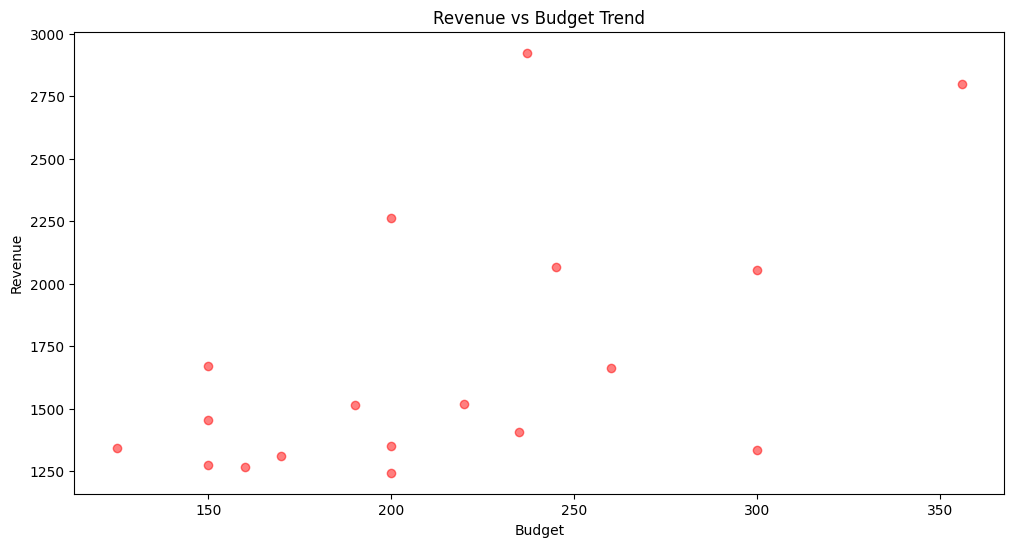

In [ ]:
#Revenue vs budget trend
plt.figure(figsize=(12, 6))
plt.scatter(new_movies_order_df['budget'], new_movies_order_df['revenue'], alpha=0.5, c='red')
plt.title('Revenue vs Budget Trend')
plt.xlabel('Budget')
plt.ylabel('Revenue')
plt.grid(False)
plt.show()

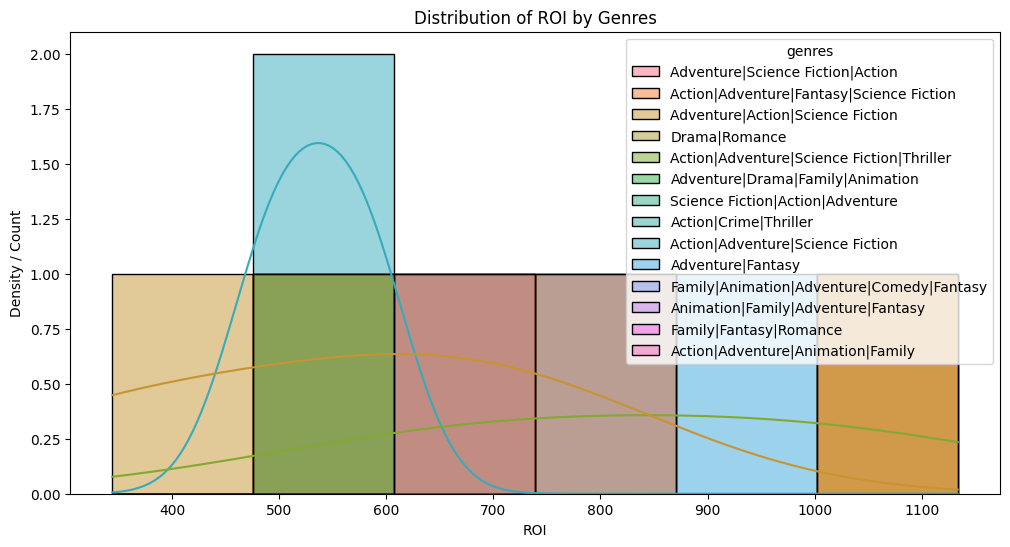

In [ ]:
# ROI distribution by genres
plt.figure(figsize=(12, 6))
sns.histplot(x=new_movies_order_df['roi'], hue=new_movies_order_df['genres'], kde=True)
plt.title('Distribution of ROI by Genres')
plt.xlabel('ROI')
plt.ylabel('Density / Count')
plt.grid(False)
plt.show()

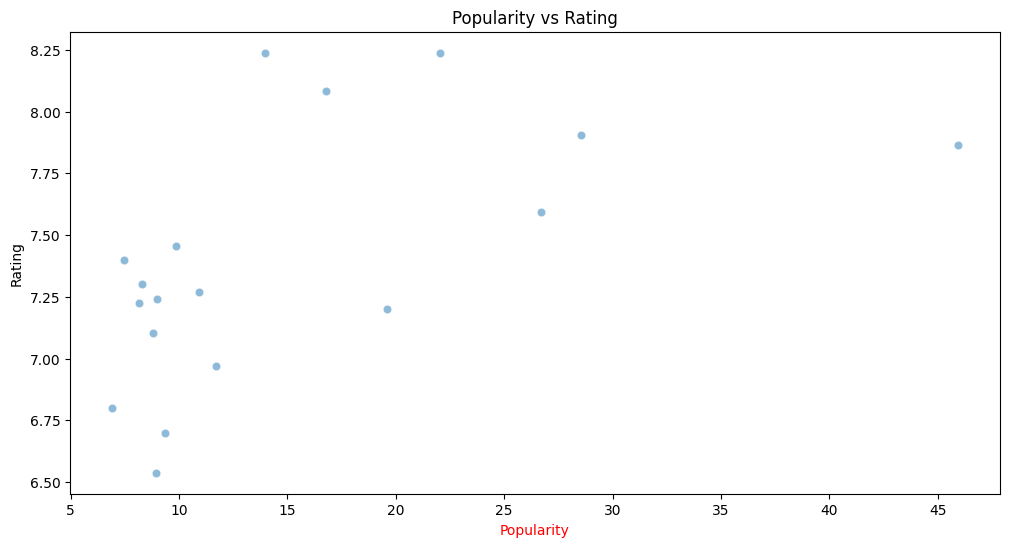

In [ ]:
#visualization of popularity vs rating
plt.figure(figsize=(12, 6))
sns.scatterplot(x=new_movies_order_df['popularity'], y=new_movies_order_df['vote_average'], alpha=0.5)
plt.title('Popularity vs Rating')
plt.xlabel('Popularity', c = 'red')
plt.ylabel('Rating')
plt.show()

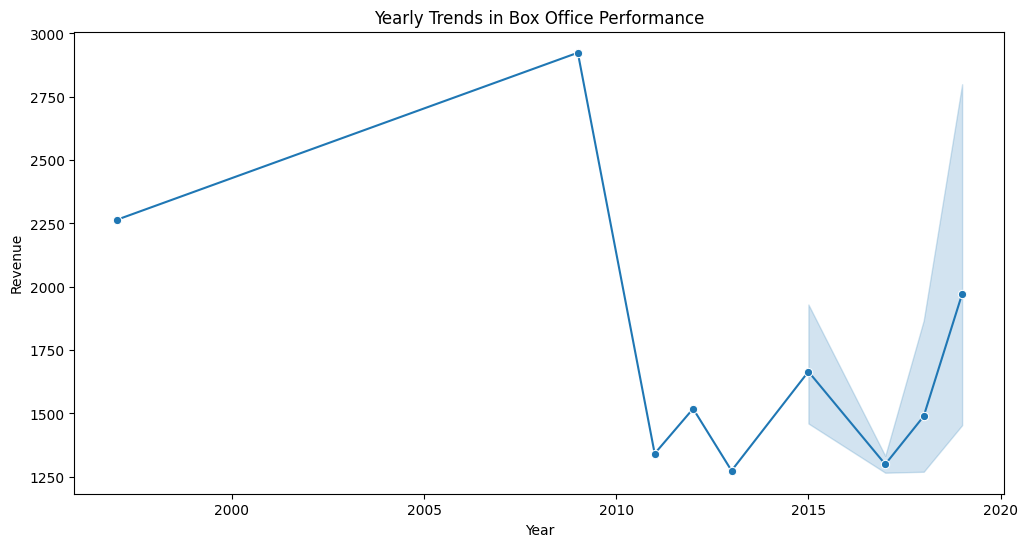

In [ ]:
# Yearly trends in Box Office Performance
plt.figure(figsize=(12, 6))
sns.lineplot(x=new_movies_order_df['release_date'].dt.year, y=new_movies_order_df['revenue'], marker='o')
plt.title('Yearly Trends in Box Office Performance')
plt.xlabel('Year')
plt.ylabel('Revenue')
plt.grid(False)
plt.show()

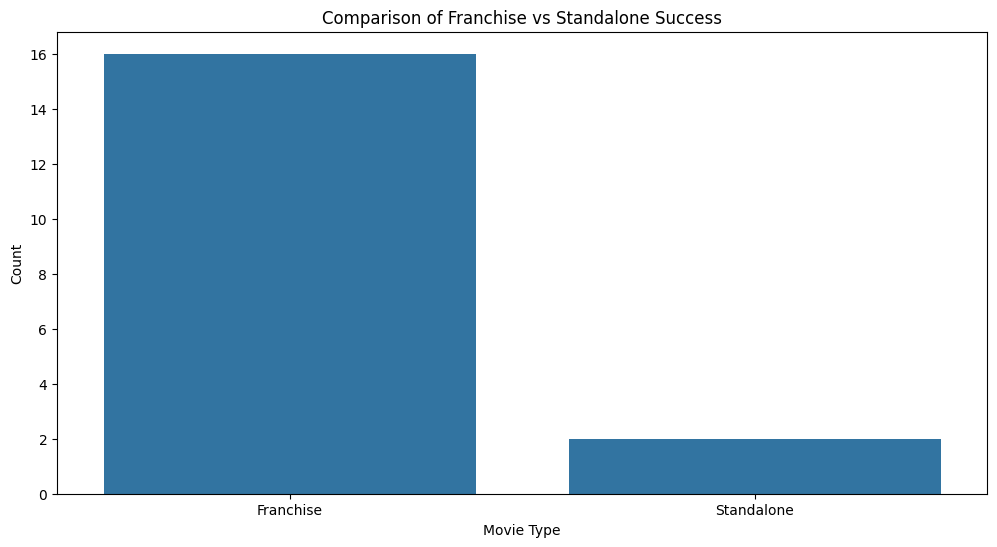

In [ ]:
# Visualizing comparison of Franchise vs standalone success
plt.figure(figsize=(12, 6))
sns.barplot(x=new_movies_order_df['movies_type'].value_counts().index, y=new_movies_order_df['movies_type'].value_counts().values)
plt.title('Comparison of Franchise vs Standalone Success')
plt.xlabel('Movie Type')
plt.ylabel('Count')
plt.show()